In [1]:
# General important stuff
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.semiconductor_laser import *

from scipy.integrate import odeint, RK45, solve_ivp

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

In [2]:
laser = LaserModel()
# laser = LaserModel('ecl')

-----------------REPORT------------------
Cavity Q:      3.4e+03
Active loss:   5680.3 MHz
Passive loss:  0.0 MHz
Cavity loss:   5680.3 MHz
Mirror loss:   51778.8 MHz
g_th:          1580.5 cm^(-1)
N_th:          3.77e18 cm^(-3)
I_th:          1.1 mA
eta_d:         90.1 %
eta:           72.1 %


c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:94: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))
c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:353: RuntimeWarning: overflow encountered in double_scalars
  laser.A * Ne + laser.B * Ne ** 2 + laser.C * Ne ** 3) - laser.v_g_a * g * Np,


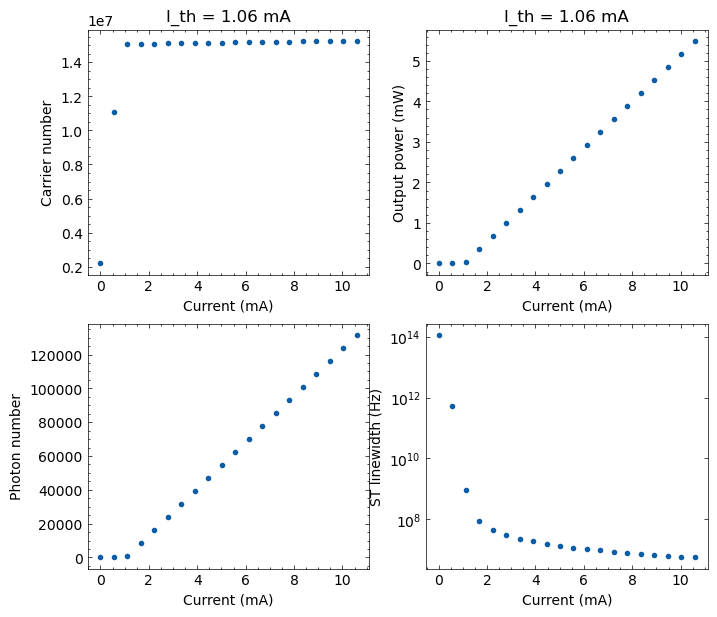

In [3]:
Ix = np.linspace(0,10*laser.I_th,20)
laser.PI_visulization(Ix,plotindensity=False)

c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:94: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))


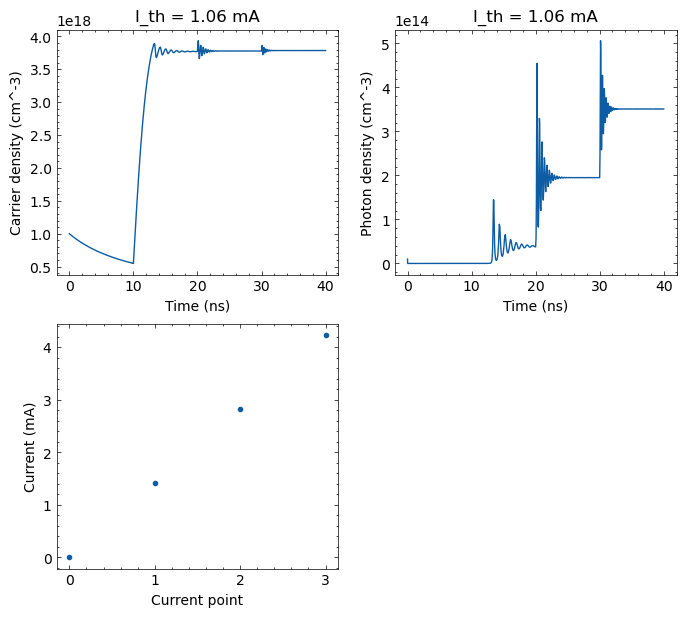

In [4]:
Ix = np.linspace(0,4*laser.I_th,4)
laser.transient_visulization(Ix)

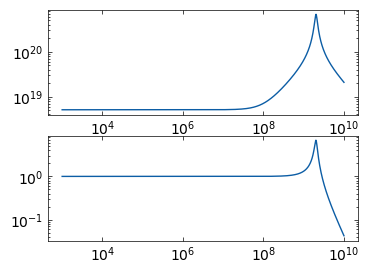

In [8]:
n1,s1,p1,H,freqx = laser.freqresp_current_mod(laser.I_th*2)
p1 = laser.h * laser.f0 * s1 * laser.Veff * laser.r_ex
plt.subplot(211)
plt.loglog(freqx,abs(n1))
plt.subplot(212)
plt.loglog(freqx,abs(p1))

In [6]:
I_drive = 4*laser.I_th
Pout, vST, Nx, t, Nt = laser.PI_current_sweep([I_drive], [0,laser.tspanmax])
Nx = Nx[:,-1].tolist()
dfdNS = laser.differentiate_req(Nx,I_drive,dx=1e-4)
dfdNS

array([[-2.08182843e+09,  4.24319983e+07],
       [-1.12222422e+13, -1.91434462e+09]])